In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Python Projects\boilerplate-page-view-time-series-visualizer\fcc-forum-pageviews.csv', )

In [3]:
# Learned about df.info which gives you the .head and .tail and also the .shape! 
#https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
df.info

<bound method DataFrame.info of             date   value
0     2016-05-09    1201
1     2016-05-10    2329
2     2016-05-11    1716
3     2016-05-12   10539
4     2016-05-13    6933
...          ...     ...
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1302  2019-12-02  220144
1303  2019-12-03  158549

[1304 rows x 2 columns]>

In [4]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [5]:
# Need to clean up the date. 1st attempt # With this, we would then have to further remove the NaN
df= df[(df['value'] >= (df['value'].quantile(0.025))) &
    (df['value'] <= (df['value'].quantile(0.975)))]

In [6]:
# Check the data. It looks like we have to remove/replace the NaN 

df.info

<bound method DataFrame.info of             date   value
10    2016-05-19   19736
17    2016-05-26   18060
18    2016-05-27   19997
19    2016-05-28   19044
20    2016-05-29   20325
...          ...     ...
1294  2019-11-24  138875
1299  2019-11-29  171584
1300  2019-11-30  141161
1301  2019-12-01  142918
1303  2019-12-03  158549

[1238 rows x 2 columns]>

In [7]:
df.head()

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [8]:
df.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


In [9]:
df.columns


Index(['date', 'value'], dtype='object')

In [10]:
df.dtypes

date     object
value     int64
dtype: object

In [11]:
# Learned about IQR
# https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
# Further explaination of Interquartile Range (IQR): https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1

#df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
# Need to turn 'date' into a column, if we set index_col=1
#df= df.reset_index()

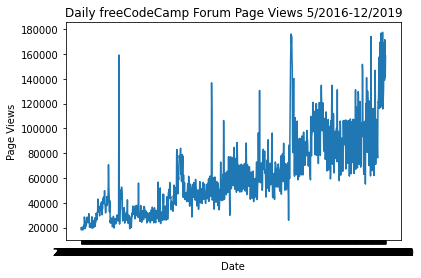

In [14]:
# Neet to plot a line plot
#https://realpython.com/pandas-plot-python/
#https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

x = df['date']
y = df['value']

line_plot = sns.lineplot(data = df, x = 'date', y = 'value').set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')



#line_plot.set_xlabel('Date')
#line_plot.set_ylabel('Page View')



In [ ]:
# Create a columns of months --- need to split / groupby data by month 

# Clean up the data: make sure it is ready to be split



In [ ]:
df.head()

In [ ]:
# Need to convert to datetime, currently 'date' is an object
#https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


# not sure why, but df['date'] is NOT permanently changed
# Had to read https://realpython.com/pandas-settingwithcopywarning/ to learn about 'views' versus 'copy'
#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

In [ ]:
df.dtypes

In [ ]:
# Let's create columns with month and year value using dt.month/dt.year
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.info

In [ ]:
# Count the total of NaN in our dataset using .isna

df.isna().sum()

In [ ]:
# Remove the NaN rows using .dropna()
df = df.dropna()

In [ ]:
df.isna().sum()

In [ ]:
# Convert 'value', 'month', 'year' into int 
df[['value', 'month', 'year']] = df[['value', 'month', 'year']].astype(int)

In [ ]:
df.dtypes

In [ ]:
df.info

In [ ]:
# Need to understand groupby: down a rabbit hole---: https://towardsdatascience.com/its-time-for-you-to-understand-pandas-group-by-function-cc12f7decfb9
# Straight to the point: https://www.w3resource.com/python-exercises/pandas/groupby/python-pandas-groupby-exercise-12.php
        
df_group = df.groupby([df['date'].dt.year, df['date'].dt.month]).agg({'value':'mean'})

In [ ]:
df_group.info

In [ ]:
# Need to rename the index values 
# https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column#:~:text=The%20reset_index()%20is%20a,the%20index%20values%20as%20columns).&text=3%200%2034-,df.,cannot%20have%20the%20same%20names.
# Use df.index.sex_names

df_group.index = df_group.index.set_names(['year', 'month'])

In [ ]:
# Need to set the index values as columns
# Use df.reset_index(inplace = True)

df_group.reset_index(inplace=True)  

In [ ]:
df_group.columns

In [ ]:
df_group.head()

In [ ]:
df_group.describe()

In [ ]:
# Need to put df_group['month'] in numerical order

df_group = df_group.sort_values(by=['month'])


In [ ]:
# Need to convert month 'int' to 'str' using dt.month_name()
# https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name/54350093

df_group['month'] = pd.to_datetime(df_group['month'], format='%m').dt.month_name().str.slice(stop=3)

In [ ]:
df_group.info

In [ ]:
df_group.head()

In [ ]:
g = sns.catplot(
    x='year', y='value', data = df_group,
    kind = 'bar', hue='month'
)

g.set(xlabel = 'Years')
g.set(ylabel = 'Average Page View')
g.add_legend(title = 'Months') 

In [ ]:
df.head()


In [ ]:
sns.boxplot(x="month", y="value", data=df)
 

In [ ]:
ax = sns.boxplot(x="year", y="value", data=df) 


In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [ ]:
# Let's combine the boxplots

f, axes = plt.subplots(figsize=(12, 7), ncols=2, sharex=False)
sns.despine(left=True)

ax2 = sns.boxplot(x='year', y='value', data=df, ax=axes[0])
ax2.set_xlabel('Year')
ax2.set_ylabel('Page Views')
ax2.set_title('Year-wise Box Plot(Trend)')

ax2 = sns.boxplot(x='month', y='value', data=df, ax=axes[1])
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot(Seasonality)')